In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset and display the first few rows
data = pd.read_csv('BikeRental.csv')
data.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday,Yes


In [3]:
# Check shape
num_rows, num_cols = data.shape[0], data.shape[1]
print(f'The dataset has {num_rows} rows and {num_cols} columns.')

The dataset has 8760 rows and 14 columns.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8758 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
data.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2)
count,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,8760.000000,8759.000000,8760.000000
mean,704.602055,11.502740,12.914361,58.240183,1.953237,1436.442808,4.074369,0.569111
std,644.997468,6.922779,12.347109,20.584774,21.376612,608.827735,13.061011,0.868746
min,0.000000,0.000000,-17.800000,-26.000000,0.000000,-678.000000,-30.600000,0.000000
25%,191.000000,6.000000,3.500000,42.000000,0.900000,939.500000,-4.700000,0.000000
50%,504.500000,12.000000,13.700000,57.000000,1.500000,1697.500000,5.100000,0.010000
75%,1065.250000,18.000000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000
max,3556.000000,24.000000,306.000000,309.000000,2000.000000,2000.000000,27.200000,3.520000


We now do some forms of visualisation to get a feeling for the data. First, we display a set of histograms for the features prior to any cleaning steps.

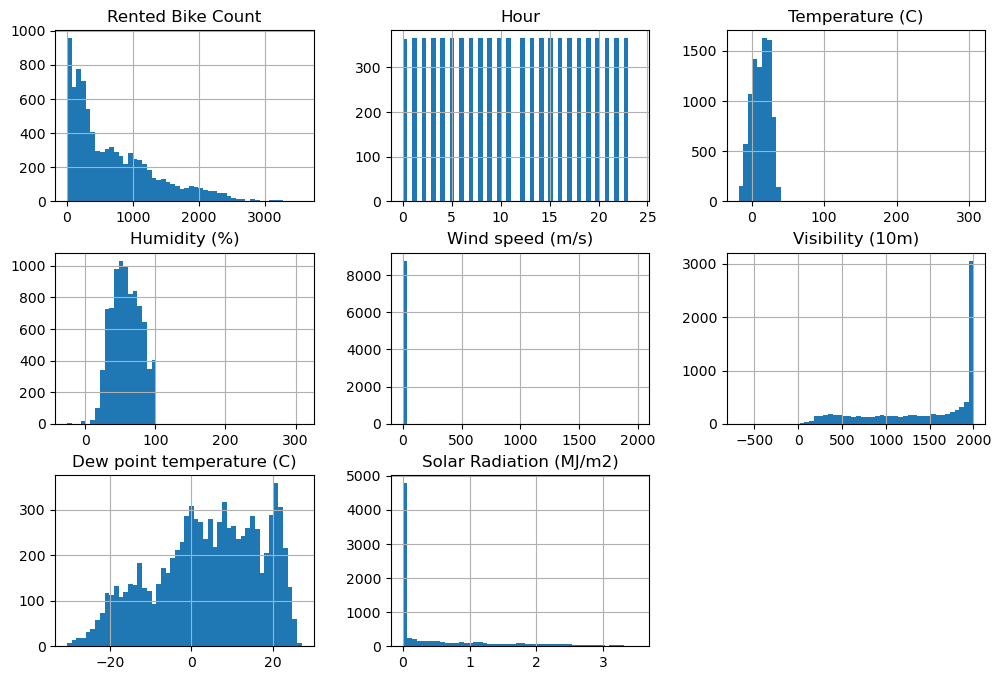

In [6]:
data.hist(bins=50, figsize=(12,8))
plt.show()

In [7]:
data['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

The "Functioning Day" feature records whether the bike rental was open for business on that day. For this task, we are only interested in predicting demand on days when the business is open, so we can remove rows where the business is closed.

In [8]:
# Filter where 'Functioning Day' is Yes then drop the column
data = data[data['Functioning Day']=='Yes']
data = data.drop('Functioning Day',axis=1)
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday'],
      dtype='object')

We will use regression techniques with "Bike Rental Count" as the target feature to make predictions, so it is important that all other features in the data are numerical.

The two features **"Holiday"** and **"Seasons"** then should be converted to numerical format as followed:
- **Holiday** will be converted to 0 for "No Holiday" and 1 for "Holiday"
- **Seasons** will be replaced by 4 new columns labeled accordingly to the season, with each stores a 0 or 1 depending on the corresponding season in each row.

In [9]:
print(data['Holiday'].unique())
print(data['Seasons'].unique())

['No Holiday' 'Holiday']
['Winter' 'Spring' 'Summer' 'Autumn']


In [10]:
from sklearn.preprocessing import OneHotEncoder

# Convert 'Holiday' to binary values
data['Holiday'] = data['Holiday'].map({'No Holiday':0, 'Holiday':1})

# Encode the seasons
encoder = OneHotEncoder(sparse_output=False)
encoded_seasons = encoder.fit_transform(data[['Seasons']])
data.reset_index(drop=True, inplace=True)
seasons = pd.DataFrame(encoded_seasons, columns=encoder.categories_[0])
data = data.join(seasons).drop(['Seasons'],axis=1)

# Display a few rows
data.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,0.0,0.0,0.0,1.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,0.0,0.0,0.0,1.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,0.0,0.0,0.0,1.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,0.0,0.0,0.0,1.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,0.0,0.0,0.0,1.0


It is known that bike rentals depend strongly on whether it's a weekday or a weekend, so we will replace the **Date** feature with a **Weekday** feature that stores 0 or 1 depending on whether the date represents a weekend or weekday.

In [13]:
# Date is currently an object so convert it to datetime first
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature (C)                     float64
Humidity (%)                          int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature (C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                         object
Snowfall (cm)                        object
Holiday                               int64
Autumn                              float64
Spring                              float64
Summer                              float64
Winter                              float64
dtype: object

In [14]:
# Extract the day, convert to binary values and store in the new 'Weekday' column
day_of_week = data['Date'].dt.dayofweek
data['Weekday'] = day_of_week.map(lambda x:1 if x<5 else 0)
data = data.drop(['Date'],axis=1)
data.head()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Winter,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,0.0,0.0,0.0,1.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,0.0,0.0,0.0,1.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,0.0,0.0,0.0,1.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,0.0,0.0,0.0,1.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,0.0,0.0,0.0,1.0,1


In [15]:
data.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature (C)              float64
Humidity (%)                   int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature (C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                  object
Snowfall (cm)                 object
Holiday                        int64
Autumn                       float64
Spring                       float64
Summer                       float64
Winter                       float64
Weekday                        int64
dtype: object

It's time to convert the remaining data to numerical format (Rainfall(mm), Snowfall(cm)), with any non-numerical entries set to NaN.

In [16]:
data = data.apply(pd.to_numeric, errors='coerce')
data.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature (C)              float64
Humidity (%)                   int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature (C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Holiday                        int64
Autumn                       float64
Spring                       float64
Summer                       float64
Winter                       float64
Weekday                        int64
dtype: object

Next, we continue with the part of checking and handling missing values in the dataset.

In [17]:
# Check for missing values
data.isna().sum()

Rented Bike Count             0
Hour                          0
Temperature (C)               0
Humidity (%)                  0
Wind speed (m/s)              1
Visibility (10m)              0
Dew point temperature (C)     1
Solar Radiation (MJ/m2)       0
Rainfall(mm)                 25
Snowfall (cm)                23
Holiday                       0
Autumn                        0
Spring                        0
Summer                        0
Winter                        0
Weekday                       0
dtype: int64

Plotting some boxplots also help to identify further problematic entries.

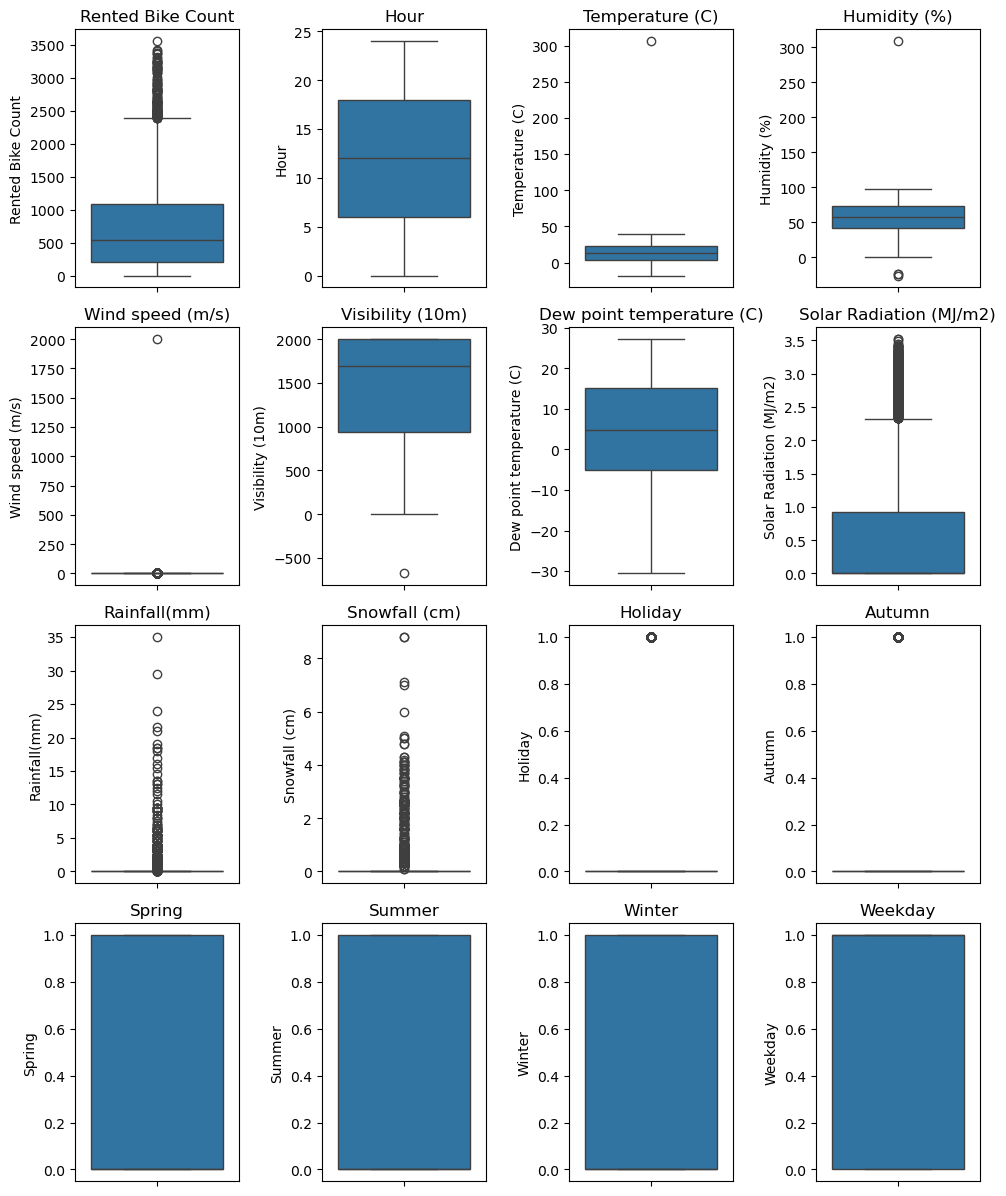

In [18]:
plt.figure(figsize=(10,15))
cols = 4
rows = len(data.columns) // cols + 1
for i, col in enumerate(data.columns):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

It can be seen from the boxplots above that there exists some outliers for some features, so we will set those problematic entries to NaN.

In [19]:
data.loc[data['Temperature (C)'] < -50, 'Temperature (C)'] = np.nan
data.loc[data['Temperature (C)'] > 50, 'Temperature (C)'] = np.nan
data.loc[data['Humidity (%)'] < 0, 'Humidity (%)'] = np.nan
data.loc[data['Humidity (%)'] > 100, 'Humidity (%)'] = np.nan
data.loc[data['Wind speed (m/s)'] < 0, 'Wind speed (m/s)'] = np.nan
data.loc[data['Wind speed (m/s)'] > 50, 'Wind speed (m/s)'] = np.nan
data.loc[data['Visibility (10m)'] < 0, 'Visibility (10m)'] = np.nan

In [20]:
data.isna().sum()

Rented Bike Count             0
Hour                          0
Temperature (C)               1
Humidity (%)                  4
Wind speed (m/s)              2
Visibility (10m)              1
Dew point temperature (C)     1
Solar Radiation (MJ/m2)       0
Rainfall(mm)                 25
Snowfall (cm)                23
Holiday                       0
Autumn                        0
Spring                        0
Summer                        0
Winter                        0
Weekday                       0
dtype: int64

We define a pipeline and generate a pre-processed version of the entire dataset by applying that pipeline. The pipeline includes imputating NaN values with the mean and scaling the values for better analyses later on.

In [22]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pl = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

preprocessed_data = pl.fit_transform(data)
preprocessed_df = pd.DataFrame(preprocessed_data, columns=data.columns)

We can also find the most correlated with bike rentals by calculating the correlation of each feature with the target. Let's just figure out the top 3 attributes:

In [26]:
corr_matrix = abs(preprocessed_df.corr())
print(corr_matrix['Rented Bike Count'].sort_values(ascending=False))
top_3 = corr_matrix['Rented Bike Count'].sort_values(ascending=False).index[1:4]
print("Top 3 attributes that are most correlated with bike rentals: ", top_3)

Rented Bike Count            1.000000
Temperature (C)              0.562773
Winter                       0.458920
Hour                         0.425460
Dew point temperature (C)    0.400238
Summer                       0.282001
Solar Radiation (MJ/m2)      0.273862
Visibility (10m)             0.210965
Humidity (%)                 0.201721
Autumn                       0.165333
Snowfall (cm)                0.152071
Rainfall(mm)                 0.128998
Wind speed (m/s)             0.125214
Holiday                      0.070070
Weekday                      0.046360
Spring                       0.015580
Name: Rented Bike Count, dtype: float64
Top 3 attributes that are most correlated with bike rentals:  Index(['Temperature (C)', 'Winter', 'Hour'], dtype='object')


The data will be divided into train and test sets using 80/20 split before going to the training part:

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

X = data.drop('Rented Bike Count', axis=1)
y = data['Rented Bike Count'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We're going to apply different regression techniques to model and predict the rental demand for bikes.

### Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

lr_pl = make_pipeline(pl, LinearRegression())
lr_pl.fit(X_train, y_train)
y_pred_train_lr = lr_pl.predict(X_train)

# Calculate the RMSE of the fit to the training data
rmse_train = mean_squared_error(y_train, y_pred_train_lr, squared=False)
# Calculate the RMSE of the baseline model (by predicting the mean value of bike rentals for all training examples)
baseline = np.full_like(y_train, y_train.mean())
rmse_baseline = mean_squared_error(y_train, baseline, squared=False)

print("RMSE for training data:", rmse_train)
print("RMSE for baseline (predicting mean):", rmse_baseline)

RMSE for training data: 437.31331015027234
RMSE for baseline (predicting mean): 646.170617501773


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


It is obvious that the RMSE for trained model is much lower than the baseline RMSE, indicating that the model is capturing meaningful patterns in the data.

Text(0, 0.5, 'Predicted')

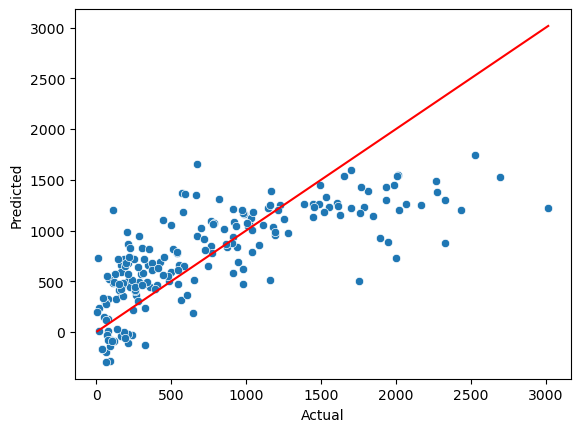

In [29]:
subset_size = 200
y_train_pred = lr_pl.predict(X_train[:subset_size])

# Scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
# A perfect solution would look like the red line
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

### Kernel Ridge Regression

In [30]:
from sklearn.kernel_ridge import KernelRidge

kr_pl = make_pipeline(pl, KernelRidge())
kr_pl.fit(X_train, y_train)

# Make predictions on the training data and calculate RMSE
y_pred_train_KR = kr_pl.predict(X_train)
rmse_train_KR = mean_squared_error(y_train, y_pred_train_KR, squared=False)
print('Kernel Ridge model RMSE on training data:', rmse_train_KR)

Kernel Ridge model RMSE on training data: 852.1498384415437


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0, 0.5, 'Predicted')

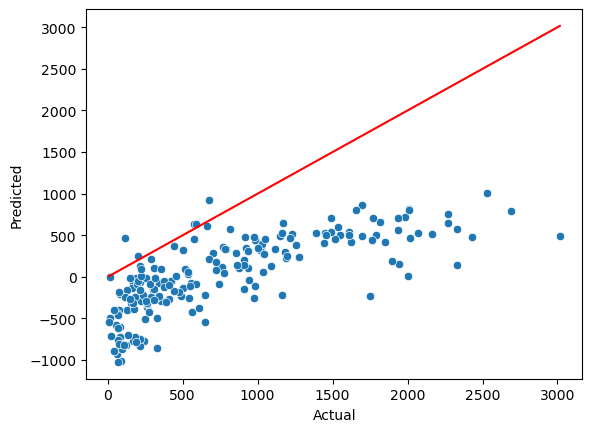

In [31]:
subset_size = 200
y_train_pred = kr_pl.predict(X_train[:subset_size])

# Scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

### Support Vector Regression (SVR)

In [32]:
from sklearn.svm import SVR

svr_pl = make_pipeline(pl, SVR())
svr_pl.fit(X_train, y_train)

# Make predictions on the training data and calculate RMSE
y_pred_train_SVR = svr_pl.predict(X_train)
rmse_train_SVR = mean_squared_error(y_train, y_pred_train_SVR, squared=False)
print('Support Vector Regression model RMSE on training data:', rmse_train_SVR)

Support Vector Regression model RMSE on training data: 532.6989781999586


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0, 0.5, 'Predicted')

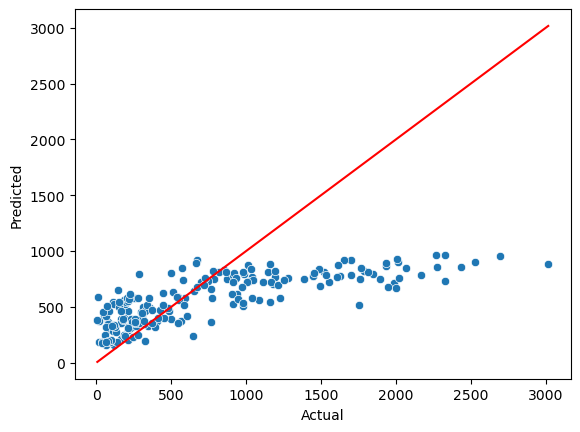

In [33]:
subset_size = 200
y_train_pred = svr_pl.predict(X_train[:subset_size])

# Scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

A 10-fold cross validation is performed for each of the three model (LR,KR,SVR) which will give us 10 RMSE values for each CV run, then we will find the mean and std of those values for each model for the validation splits.

In [39]:
from sklearn.model_selection import cross_validate

cv_lr = cross_validate(lr_pl, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
rmse_lr = -cv_lr['test_score']
for i in range(len(rmse_lr)):
    print(f'Linear Regression RMSE for fold {i+1}: {rmse_lr[i]}')
#Linear Regression CV mean and std RMSE from the 10 folds:
rmse_LR_mean = rmse_lr.mean()
rmse_LR_std  = rmse_lr.std()
print('Linear Regression CV Scores:') 
print(f'Mean: {rmse_LR_mean:.2f}, Std: {rmse_LR_std:.2f}\n')

Linear Regression RMSE for fold 1: 434.51629177452304
Linear Regression RMSE for fold 2: 444.55914487890186
Linear Regression RMSE for fold 3: 444.6902368728921
Linear Regression RMSE for fold 4: 466.3919679077765
Linear Regression RMSE for fold 5: 441.7564194567398
Linear Regression RMSE for fold 6: 419.1920348540515
Linear Regression RMSE for fold 7: 422.40961888161524
Linear Regression RMSE for fold 8: 460.804300547925
Linear Regression RMSE for fold 9: 424.81079330417316
Linear Regression RMSE for fold 10: 424.61486669949005
Linear Regression CV Scores:
Mean: 438.37, Std: 15.46



In [35]:
cv_kr = cross_validate(kr_pl, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
rmse_kr = -cv_kr['test_score']
for i in range(len(rmse_kr)):
    print(f'Kernel Ridge RMSE for fold {i+1}: {rmse_kr[i]}')
# Kernel Ridge CV mean and std:
rmse_KR_mean = rmse_kr.mean()
rmse_KR_std  = rmse_kr.std()
print('Kernel Ridge Regression CV Scores:') 
print(f'Mean: {rmse_KR_mean:.2f}, Std: {rmse_KR_std:.2f}\n')

Kernel Ridge RMSE for fold 1: 853.2720717941495
Kernel Ridge RMSE for fold 2: 855.4169191412117
Kernel Ridge RMSE for fold 3: 846.7902634493988
Kernel Ridge RMSE for fold 4: 870.6616064723688
Kernel Ridge RMSE for fold 5: 846.9979197166716
Kernel Ridge RMSE for fold 6: 827.6038238001828
Kernel Ridge RMSE for fold 7: 854.185659108439
Kernel Ridge RMSE for fold 8: 891.233560286611
Kernel Ridge RMSE for fold 9: 846.3997919393574
Kernel Ridge RMSE for fold 10: 836.0463990721947
Kernel Ridge Regression CV Scores:
Mean: 852.86, Std: 16.83



In [36]:
cv_svr = cross_validate(svr_pl, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
rmse_svr = -cv_svr['test_score']
for i in range(len(rmse_svr)):
    print(f'Supprot Vector Regression RMSE for fold {i+1}: {rmse_svr[i]}')
#Linear Regression CV mean and std:
rmse_SVR_mean = rmse_svr.mean()
rmse_SVR_std  = rmse_svr.std()
print('Support Vector Regression CV Scores:') 
print(f'Mean: {rmse_SVR_mean:.2f}, Std: {rmse_SVR_std:.2f}\n')

Supprot Vector Regression RMSE for fold 1: 540.5295658630392
Supprot Vector Regression RMSE for fold 2: 552.5972353442004
Supprot Vector Regression RMSE for fold 3: 535.0762368416754
Supprot Vector Regression RMSE for fold 4: 561.9672448368784
Supprot Vector Regression RMSE for fold 5: 545.7917766686877
Supprot Vector Regression RMSE for fold 6: 506.3160992328197
Supprot Vector Regression RMSE for fold 7: 529.8415972636569
Supprot Vector Regression RMSE for fold 8: 579.4414088210324
Supprot Vector Regression RMSE for fold 9: 541.5184975508033
Supprot Vector Regression RMSE for fold 10: 515.0719046394294
Support Vector Regression CV Scores:
Mean: 540.82, Std: 20.27



From the 3 regression methods above, linear regression might be the best one due to lowest mean and std RMSE compared to the other two.

However, both the Kernel Ridge Regression and SVR have hyperparameters that can be adjusted to suit the problem by using grid search to systematically compare the generalisation performance (RMSE) obtained with different hyperparameter settings (10-fold CV).

For Kernel Ridge, we will vary the hyperparameter **alpha**.
For SVR, we will vary the hyperparameter **C**.

In [37]:
from sklearn.model_selection import GridSearchCV


# Define the GridSearchCV objects for each model
kr_cv = GridSearchCV(kr_pl,
                     param_grid={'kernelridge__alpha': [0.1, 1, 10, 100, 1000, 5000, 10000]},
                     cv=10, scoring = 'neg_root_mean_squared_error',
                     return_train_score = True) 
svr_cv = GridSearchCV(svr_pl,
                      param_grid={'svr__C': [0.1, 1, 10, 100, 1000, 5000, 10000]},
                      cv=10, scoring = 'neg_root_mean_squared_error',
                     return_train_score = True)

# Fit the GridSearchCV objects to the training data
kr_cv.fit(X_train, y_train)
svr_cv.fit(X_train, y_train)

# Print the best hyperparameter setting for each model
print("Best hyperparameter setting for Kernel Ridge Regression:", kr_cv.best_params_)
print("Best hyperparameter setting for Support Vector Regression:", svr_cv.best_params_)

# Create pipeline using the best hyperparameter
pipeline_best_kr = make_pipeline(pl, KernelRidge(alpha=kr_cv.best_params_.get('kernelridge__alpha',1)))
pipeline_best_svr = make_pipeline(pl, SVR(C=svr_cv.best_params_.get('svr__C',1)))

# Train and apply the chosen model to the test set
pipeline_best_kr.fit(X_train, y_train)
kr_predictions = pipeline_best_kr.predict(X_test)
kr_rmse = mean_squared_error(y_test, kr_predictions, squared=False)

pipeline_best_svr.fit(X_train, y_train)
svr_predictions = pipeline_best_svr.predict(X_test)
svr_rmse = mean_squared_error(y_test, svr_predictions, squared=False)

print("Kernel Ridge Regression RMSE on test set:", kr_rmse)
print("Support Vector Regression RMSE on test set:", svr_rmse)

Best hyperparameter setting for Kernel Ridge Regression: {'kernelridge__alpha': 10}
Best hyperparameter setting for Support Vector Regression: {'svr__C': 10000}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Kernel Ridge Regression RMSE on test set: 825.1456306983141
Support Vector Regression RMSE on test set: 245.37809382271666


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0, 0.5, 'Predicted')

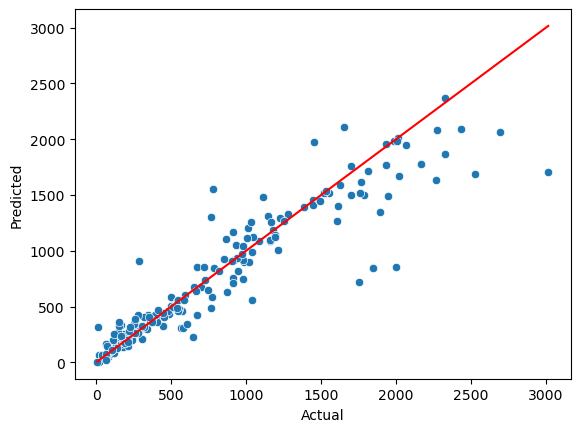

In [ ]:
subset_size = 200
y_train_pred = pipeline_best_svr.predict(X_train[:subset_size])

# Then create a scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')